# Exploratory Analysis 

## Import data and process data 

In [39]:
# Import the packages 
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from statistics import mode
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preview

In [40]:
# Read the dataset into the dataframe 
data = pd.read_csv("./diabetic_data.csv")

In [41]:
# Check the size of the dataset 
data.shape

(101766, 50)

In [42]:
# Check the overall information:data typle and null values
data.info()
"""The columns do not contain null values, so recheck the object data type"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

'The columns do not contain null values, so recheck the object data type'

In [43]:
# recheck the object data type 
for i in data.columns:
    if data[i].dtype==object:
        d= data[i].value_counts()
        print(pd.DataFrame(data=d))
"""There are no null values in the dataset"""

                  race
Caucasian        76099
AfricanAmerican  19210
?                 2273
Hispanic          2037
Other             1506
Asian              641
                 gender
Female            54708
Male              47055
Unknown/Invalid       3
            age
[70-80)   26068
[60-70)   22483
[50-60)   17256
[80-90)   17197
[40-50)    9685
[30-40)    3775
[90-100)   2793
[20-30)    1657
[10-20)     691
[0-10)      161
           weight
?           98569
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
    payer_code
?        40256
MC       32439
HM        6274
SP        5007
BC        4655
MD        3532
CP        2533
UN        2448
CM        1937
OG        1033
PO         592
DM         549
CH         146
WC         135
OT          95
MP          79
SI          55
FR           1
                                   medical_specialty
?                              

        glyburide-metformin
No                   101060
Steady                  692
Up                        8
Down                      6
        glipizide-metformin
No                   101753
Steady                   13
        glimepiride-pioglitazone
No                        101765
Steady                         1
        metformin-rosiglitazone
No                       101764
Steady                        2
        metformin-pioglitazone
No                      101765
Steady                       1
    change
No   54755
Ch   47011
     diabetesMed
Yes        78363
No         23403
     readmitted
NO        54864
>30       35545
<30       11357


'There are no null values in the dataset'

In [44]:
# Check the numerical data values 
data.describe().transpose()

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

 """description: 
         1) encounter_id and patient_nbr need to be cleaned;
         2) the maximum days for stay in hospital is 14 days
         3) average num_lab_procedures=43
         4) average num_medications=16
         5) average num_diagnoses=7.4 """

## Attribute Plotting 

### Readmission Rate Count 

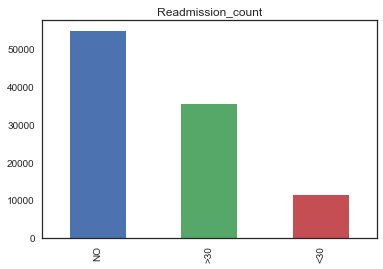

In [45]:
target_count=data['readmitted'].value_counts()
target_count.plot(kind='bar', title='Readmission_count')

### Age and Gender Count

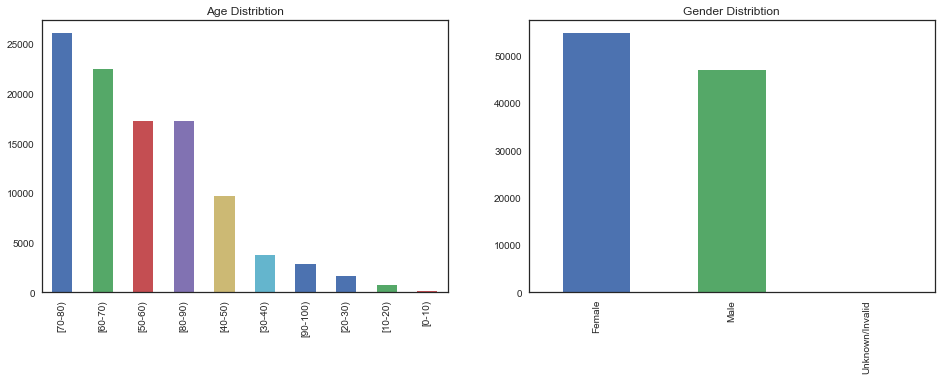

In [46]:
age_count=data["age"].value_counts()
gender_count=data["gender"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = age_count.plot(kind='bar',title='Age Distribtion',ax=ax1)
_ = gender_count.plot(kind='bar',title='Gender Distribtion',ax=ax2)

### Race and Weight Count 

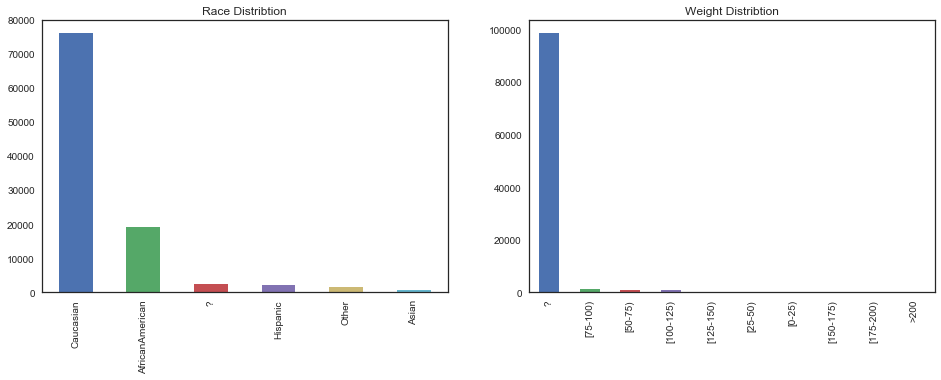

In [47]:
race_count=data["race"].value_counts()
weight_count=data["weight"].value_counts()# Have to deal with unkown/invalid count 
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(16,5))
_ = race_count.plot(kind='bar',title='Race Distribtion',ax=ax1)# Missing values
_ = weight_count.plot(kind='bar',title='Weight Distribtion',ax=ax2)# Missing values 

### Numerical data Distribution 

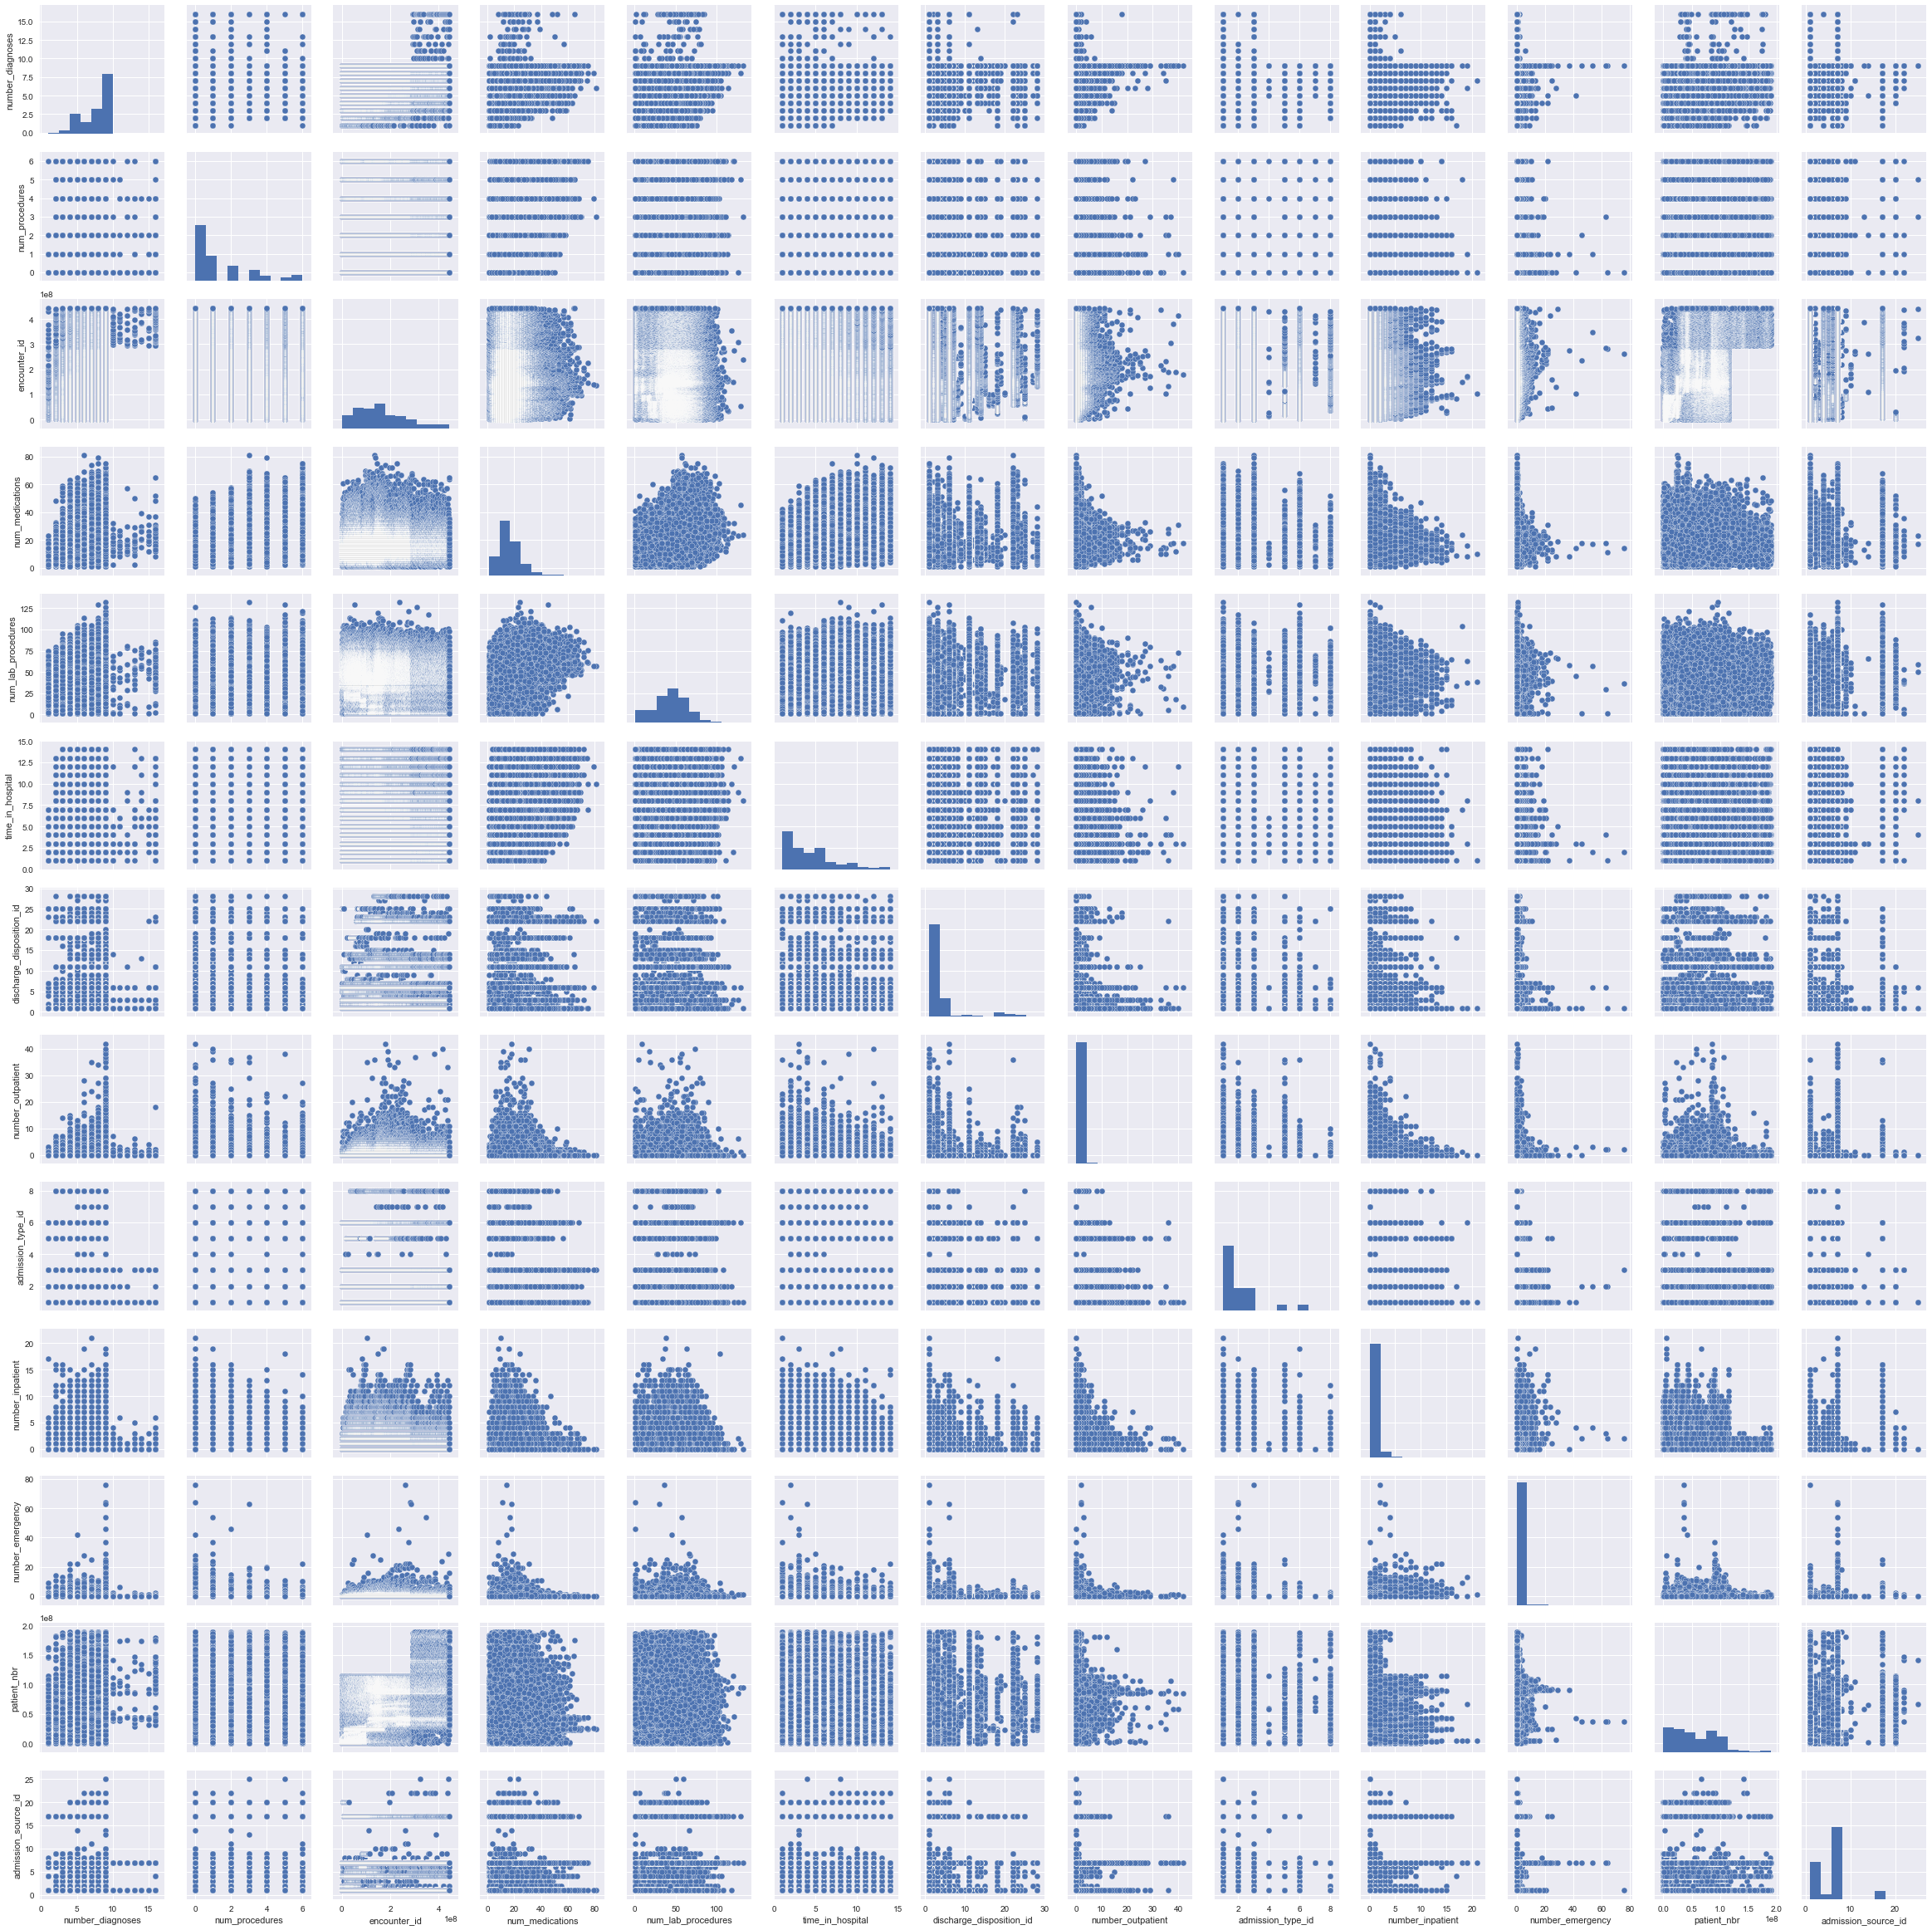

In [48]:
num_col = list(set(list(data._get_numeric_data().columns))- {'readmitted'})
sns.set()
sns.pairplot(data[num_col], size = 2.5)
plt.show();

# Data Processing

In [49]:
# Make a copy of the file for pre-processing 
train = data.copy(deep=True)

## Processing object-type missing values

In [50]:
df = []
# Checkthe percentage of the missing values 
for col in train.columns:
    if train[col].dtype == object:
        count_missing = train[col][train[col] == '?'].count()
        percent_missing = (count_missing.sum()/train.shape[0]*100).round(2)
#         print(col,count_missing,percent_missing)
        df.append([col,count_missing,percent_missing])
missing_value=pd.DataFrame(df,columns=["col","count_missing","percent_missing"]).sort_values(by="percent_missing",ascending=False)
missing_value

col  count_missing  percent_missing
3                     weight          98569            96.86
5          medical_specialty          49949            49.08
4                 payer_code          40256            39.56
0                       race           2273             2.23
8                     diag_3           1423             1.40
7                     diag_2            358             0.35
6                     diag_1             21             0.02
29       glyburide-metformin              0             0.00
24              troglitazone              0             0.00
25                tolazamide              0             0.00
26                   examide              0             0.00
27               citoglipton              0             0.00
28                   insulin              0             0.00
33    metformin-pioglitazone              0             0.00
30       glipizide-metformin              0             0.00
31  glimepiride-pioglitazone              0             0.00
32   metformin-rosiglitazone              0             0.00
22                  acarbose              0             0.00
34                    change              0             0.00
35               diabetesMed              0             0.00
23                  miglitol              0             0.00
18                 glyburide              0             0.00
21             rosiglitazone              0             0.00
20              pioglitazone              0             0.00
19               tolbutamide              0             0.00
1                     gender              0             0.00
17                 glipizide              0             0.00
16             acetohexamide              0             0.00
15               glimepiride              0             0.00
14            chlorpropamide              0             0.00
13               nateglinide              0             0.00
12               repaglinide              0             0.00
11                 metformin              0             0.00
10                 A1Cresult              0             0.00
9              max_glu_serum              0             0.00
2                        age              0             0.00
36                readmitted              0             0.00

"""High missing values: 1. weight 2. medical_specialty 3. payer_code 4. race /
     Other values to clean: 1. diagosis_1 2. diagosis_2 3. diagnosis_3"""

### Drop high missing values 

In [51]:
# drop the irrelavant and high missing value variables
# drop weight because of its high missing value 97% 
# drop medical_specialty because of its high missing value 49.8%
train=train.drop(['weight','medical_specialty'],axis=1)
# drop payer_code because it is irrelevant to our studies 
train=train.drop(['payer_code'],axis=1)
# Drop only the missing values in all three diagonosis categories 
train = train.drop(set(train[(train['diag_1']== '?') & (train['diag_2'] == '?') & (train['diag_3'] == '?')].index))
# Drop the patients who is expired after discharge which is out of our interest population
train = train.drop(set(train[train['discharge_disposition_id']==11].index))

In [52]:
train.shape

(100123, 47)

### Drop missing values in 'Gender' and 'Race'

In [53]:
# Process the missing values in gender
print('gender', train['gender'][train['gender'] == 'Unknown/Invalid'].count()) #only 3 missing values 
train = train.drop(set(train['gender'][train['gender'] == 'Unknown/Invalid'].index))
# Process the missing values in race
train= train.drop(set(train['race'][train['race']=='?'].index)) # drop the 2273 missing values 

gender 3


In [54]:
train.shape

(97883, 47)

### Drop irrelevant variables

In [55]:
# Drop irrelevant variables and high percent missing varaibles 
train=train.drop(["encounter_id","patient_nbr"],axis=1)

In [56]:
# Drop two attributes citoglipton and examide that have the all same value
train=train.drop(["citoglipton","examide"],axis = 1)

## Creating/recoding new features

In [57]:
train.shape

(97883, 43)

"""Recoding Plan: In this section, we recode the following variables:
   1. new variable patient_service: This new feature includes the patients' use of hospital service
   2. new variable med_change: This new feature calculate the change of medication dose of a patient
   3. new variable num_med: This new feature calculate the number of medication usage of each patient """

### Create new feature: patient_service 

In [58]:
# Create a new feature service_utilization
train['patient_service'] = train['number_outpatient'] + train['number_emergency'] + train['number_inpatient']

### Create new feature: med_change

In [59]:
# Create a new variable to calculate the change of medication dose
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [60]:
for col in keys:
    col_name = str(col) + 'new' #change the column name 
    train[col_name] = train[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)# recode the med use into binary variable
train['med_change'] = 0
for col in keys:
    col_name = str(col) + 'new'
    train['med_change'] = train['med_change'] + train[col_name]
    del train[col_name]

In [61]:
# Check the status of the new feature med_change
train['med_change'].value_counts()

0    71177
1    25307
2     1288
3      106
4        5
Name: med_change, dtype: int64

### Create new feature: num_med

In [62]:
# calculate the number of medications used for each patient 
for col in keys:
    train[col] = train[col].replace('No', 0)
    train[col] = train[col].replace('Steady', 1)
    train[col] = train[col].replace('Up', 1)
    train[col] = train[col].replace('Down', 1) 
train['num_med'] = 0
for col in keys:
    train['num_med'] = train['num_med'] + train[col]

In [63]:
train['num_med'].value_counts()

1    45365
0    22454
2    21165
3     7537
4     1300
5       57
6        5
Name: num_med, dtype: int64

### Recode diagnosis into new categories 

In [64]:
"""diag_1=primary diagnosis; diag_2=secondary diagnosis; diag_3=additional diagnosis\
i"""
# duplicate a diagnosis column
train['primary_diag'] = train['diag_1']
train['secondary_diag'] = train['diag_2']
train['additional_diag'] = train['diag_3']

In [65]:
# replace the unknown values "?" with -1
train['primary_diag'] = train['primary_diag'].replace('?', -1)
train['secondary_diag'] = train['secondary_diag'].replace('?', -1)
train['additional_diag'] = train['additional_diag'].replace('?', -1)

In [66]:
# recode ICE code of V or E to “other” category = 0
train.loc[train['diag_1'].str.contains('V'), ['primary_diag']] = 0
train.loc[train['diag_1'].str.contains('E'), ['primary_diag']] = 0
train.loc[train['diag_2'].str.contains('V'), ['secondary_diag']] = 0
train.loc[train['diag_2'].str.contains('E'), ['secondary_diag']] = 0
train.loc[train['diag_3'].str.contains('V'), ['additional_diag']] = 0
train.loc[train['diag_3'].str.contains('E'), ['additional_diag']] = 0

In [67]:
# convert the data type to float to enable computations later
train['primary_diag'] = train['primary_diag'].astype(float)
train['secondary_diag'] = train['secondary_diag'].astype(float)
train['additional_diag'] = train['additional_diag'].astype(float)

In [68]:
# recode ICD codes of diag1,diag2,diag3 between certain ranges to certain categories
for index, row in train.iterrows():
    if (row['primary_diag'] >= 390 and row['primary_diag'] < 460) or (np.floor(row['primary_diag']) == 785):
        train.loc[index, 'primary_diag'] = 1
    elif (row['primary_diag'] >= 460 and row['primary_diag'] < 520) or (np.floor(row['primary_diag']) == 786):
        train.loc[index, 'primary_diag'] = 2
    elif (row['primary_diag'] >= 520 and row['primary_diag'] < 580) or (np.floor(row['primary_diag']) == 787):
        train.loc[index, 'primary_diag'] = 3
    elif (np.floor(row['primary_diag']) == 250):
        train.loc[index, 'primary_diag'] = 4
    elif (row['primary_diag'] >= 800 and row['primary_diag'] < 1000):
        train.loc[index, 'primary_diag'] = 5
    elif (row['primary_diag'] >= 710 and row['primary_diag'] < 740):
        train.loc[index, 'primary_diag'] = 6
    elif (row['primary_diag'] >= 580 and row['primary_diag'] < 630) or (np.floor(row['primary_diag']) == 788):
        train.loc[index, 'primary_diag'] = 7
    elif (row['primary_diag'] >= 140 and row['primary_diag'] < 240):
        train.loc[index, 'primary_diag'] = 8
    else:
        train.loc[index, 'primary_diag'] = 0

In [69]:
for index, row in train.iterrows():
    if (row['secondary_diag'] >= 390 and row['secondary_diag'] < 460) or (np.floor(row['secondary_diag']) == 785):
        train.loc[index, 'secondary_diag'] = 1
    elif (row['secondary_diag'] >= 460 and row['secondary_diag'] < 520) or (np.floor(row['secondary_diag']) == 786):
        train.loc[index, 'secondary_diag'] = 2
    elif (row['secondary_diag'] >= 520 and row['secondary_diag'] < 580) or (np.floor(row['secondary_diag']) == 787):
        train.loc[index, 'secondary_diag'] = 3
    elif (np.floor(row['secondary_diag']) == 250):
        train.loc[index, 'secondary_diag'] = 4
    elif (row['secondary_diag'] >= 800 and row['secondary_diag'] < 1000):
        train.loc[index, 'secondary_diag'] = 5
    elif (row['secondary_diag'] >= 710 and row['secondary_diag'] < 740):
        train.loc[index, 'secondary_diag'] = 6
    elif (row['secondary_diag'] >= 580 and row['secondary_diag'] < 630) or (np.floor(row['secondary_diag']) == 788):
        train.loc[index, 'secondary_diag'] = 7
    elif (row['secondary_diag'] >= 140 and row['secondary_diag'] < 240):
        train.loc[index, 'secondary_diag'] = 8
    else:
        train.loc[index, 'secondary_diag'] = 0

In [70]:
for index, row in train.iterrows():
    if (row['additional_diag'] >= 390 and row['additional_diag'] < 460) or (np.floor(row['additional_diag']) == 785):
        train.loc[index, 'additional_diag'] = 1
    elif (row['additional_diag'] >= 460 and row['additional_diag'] < 520) or (np.floor(row['additional_diag']) == 786):
        train.loc[index, 'additional_diag'] = 2
    elif (row['additional_diag'] >= 520 and row['additional_diag'] < 580) or (np.floor(row['additional_diag']) == 787):
        train.loc[index, 'additional_diag'] = 3
    elif (np.floor(row['additional_diag']) == 250):
        train.loc[index, 'additional_diag'] = 4
    elif (row['additional_diag'] >= 800 and row['additional_diag'] < 1000):
        train.loc[index, 'additional_diag'] = 5
    elif (row['additional_diag'] >= 710 and row['additional_diag'] < 740):
        train.loc[index, 'additional_diag'] = 6
    elif (row['additional_diag'] >= 580 and row['additional_diag'] < 630) or (np.floor(row['additional_diag']) == 788):
        train.loc[index, 'additional_diag'] = 7
    elif (row['additional_diag'] >= 140 and row['additional_diag'] < 240):
        train.loc[index, 'additional_diag'] = 8
    else:
        train.loc[index, 'additional_diag'] = 0

In [71]:
train[['diag_1','primary_diag']].head(15).T

0    1    2  3    4    5    6    7    8    9      10   11  \
diag_1        250.83  276  648  8  197  414  414  428  398  434  250.7  157   
primary_diag       4    0    0  0    8    1    1    1    1    1      4    8   

               12   13   14  
diag_1        428  428  518  
primary_diag    1    1    2

In [72]:
train[['diag_2','secondary_diag']].head(15).T

0       1    2       3    4    5    6    7    8    9    10  \
diag_2          ?  250.01  250  250.43  157  411  411  492  427  198  403   
secondary_diag  0       4    4       4    8    1    1    2    1    8    1   

                 11      12   13   14  
diag_2          288  250.43  411  998  
secondary_diag    0       4    1    5

In [73]:
train[['diag_3','additional_diag']].head(15).T

0    1    2    3    4    5    6    7   8    9    10   11  \
diag_3           ?  255  V27  403  250  250  V45  250  38  486  996  197   
additional_diag  0    0    0    1    4    4    0    4   0    2    5    8   

                    12   13   14  
diag_3           250.6  427  627  
additional_diag      4    1    7

### Recode admission_type_id and discharge_disposition_id and admission_source_id

In [74]:
"""Use the similarity of the categories to recode and reduct the categories"""

'Use the similarity of the categories to recode and reduct the categories'

In [75]:
train['admission_type_id'].value_counts()

1    51818
3    18383
2    17542
6     5162
5     4634
8      317
7       17
4       10
Name: admission_type_id, dtype: int64

In [76]:
# recode admission type (1-Emergency 5-Referral)
train['admission_type_id'] = train['admission_type_id'].replace(2,1)
train['admission_type_id'] = train['admission_type_id'].replace(7,1)
train['admission_type_id'] = train['admission_type_id'].replace(6,5)
train['admission_type_id'] = train['admission_type_id'].replace(8,5)

In [77]:
train['discharge_disposition_id'].sort_values(ascending=False,inplace=False).value_counts()

1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
5      1143
25      973
4       765
7       611
23      406
13      396
14      369
28      138
8       107
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [78]:
# recode discharge_disposition_id type (1-discharged to home 2-other 3-? 4-?)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(6,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(8,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(9,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(13,1)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(3,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(4,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(5,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(14,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(22,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(23,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(24,2)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(12,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(15,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(16,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(17,10)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(25,18)
train['discharge_disposition_id'] = train['discharge_disposition_id'].replace(26,18)

In [79]:
train['admission_source_id'].sort_values(ascending=False,inplace=False).value_counts()

7     55527
1     28617
17     6565
4      2936
6      1969
2      1023
5       808
3       185
20      158
9        54
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [80]:
# recode ad_mission_source_id type (1-emergency 4-home 9-transfer 11-other) 
train['admission_source_id'] = train['admission_source_id'].replace(2,1)
train['admission_source_id'] = train['admission_source_id'].replace(3,1)
train['admission_source_id'] = train['admission_source_id'].replace(5,4)
train['admission_source_id'] = train['admission_source_id'].replace(6,4)
train['admission_source_id'] = train['admission_source_id'].replace(10,4)
train['admission_source_id'] = train['admission_source_id'].replace(22,4)
train['admission_source_id'] = train['admission_source_id'].replace(25,4)
train['admission_source_id'] = train['admission_source_id'].replace(7,9)
train['admission_source_id'] = train['admission_source_id'].replace(17,9)
train['admission_source_id'] = train['admission_source_id'].replace(20,9)
train['admission_source_id'] = train['admission_source_id'].replace(21,9)
train['admission_source_id'] = train['admission_source_id'].replace(13,11)
train['admission_source_id'] = train['admission_source_id'].replace(14,11)

### Create dummy Variables-change, gender and diabetesMed

In [81]:
# Recode change 
train['change'] = train['change'].replace('Ch', 1)
train['change'] = train['change'].replace('No', 0)
# Recode gender 
train['gender'] = train['gender'].replace('Male', 1)
train['gender'] = train['gender'].replace('Female', 0)
# Recode diabetesMed
train['diabetesMed'] = train['diabetesMed'].replace('Yes', 1)
train['diabetesMed'] = train['diabetesMed'].replace('No', 0)

### Recode the outcome variable-Readmitted

In [82]:
"""Since our interest here is the readmission rate that is less than 30 days??"""
# calculate the outcome variable readmission
train['readmitted'] = train['readmitted'].replace('>30', 0)
train['readmitted'] = train['readmitted'].replace('<30', 1)
train['readmitted'] = train['readmitted'].replace('NO', 0)

### Recode the ordinal variable-Age

In [83]:
train['age'].sort_values(ascending=False).value_counts()

[70-80)     24978
[60-70)     21699
[50-60)     16743
[80-90)     16320
[40-50)      9408
[30-40)      3689
[90-100)     2601
[20-30)      1604
[10-20)       682
[0-10)        159
Name: age, dtype: int64

In [84]:
#recode age using mean of each order 
"""recode it by means is the trade-off of uisng the continuous 1-10. Using the mean can maintain the interpretability of the age"""
age_dict = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}
train['age'] = train.age.map(age_dict)
train['age'] = train['age'].astype('int64')

### Recode the categorical variables: Race, A1Cresult,max_glu_serum

In [85]:
train['race'].sort_values(ascending=False,inplace=False).value_counts()

Caucasian          74854
AfricanAmerican    18888
Hispanic            2024
Other               1485
Asian                632
Name: race, dtype: int64

In [86]:
train['race'] = train['race'].replace('Caucasian', 1)
train['race'] = train['race'].replace('AfricanAmerican', 2)
train['race'] = train['race'].replace('Hispanic', 3)
train['race'] = train['race'].replace('Asian', 4) 
train['race'] = train['race'].replace('Other', 0) 

In [87]:
train['A1Cresult'].sort_values(ascending=False,inplace=False).value_counts()

None    81427
>8       7897
Norm     4857
>7       3702
Name: A1Cresult, dtype: int64

In [88]:
# recode A1Cresult 
train['A1Cresult'] = train['A1Cresult'].replace('>7', 1)
train['A1Cresult'] = train['A1Cresult'].replace('>8', 1)
train['A1Cresult'] = train['A1Cresult'].replace('Norm', 0)
train['A1Cresult'] = train['A1Cresult'].replace('None', 99) 

In [89]:
train['max_glu_serum'].sort_values(ascending=False,inplace=False).value_counts()

None    92712
Norm     2549
>200     1421
>300     1201
Name: max_glu_serum, dtype: int64

In [90]:
# recode max_glu_serum using the similar approach
train['max_glu_serum'] = train['max_glu_serum'].replace('>200', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('>300', 1)
train['max_glu_serum'] = train['max_glu_serum'].replace('Norm', 0)
train['max_glu_serum'] = train['max_glu_serum'].replace('None', 99)

In [91]:
train.to_csv('./modified_diabetes1205_beforeEDA.csv',index=None)

# Feature Engineering 

In [92]:
train=pd.read_csv('./modified_diabetes1205_beforeEDA.csv')

In [93]:
train.head(5).T

0       1    2       3    4
race                           1       1    2       1    1
gender                         0       0    0       1    1
age                            5      15   25      35   45
admission_type_id              5       1    1       1    1
discharge_disposition_id      18       1    1       1    1
admission_source_id            1       9    9       9    9
time_in_hospital               1       3    2       2    1
num_lab_procedures            41      59   11      44   51
num_procedures                 0       0    5       1    0
num_medications                1      18   13      16    8
number_outpatient              0       0    2       0    0
number_emergency               0       0    0       0    0
number_inpatient               0       0    1       0    0
diag_1                    250.83     276  648       8  197
diag_2                         ?  250.01  250  250.43  157
diag_3                         ?     255  V27     403  250
number_diagnoses               1       9    6       7    5
max_glu_serum                 99      99   99      99   99
A1Cresult                     99      99   99      99   99
metformin                      0       0    0       0    0
repaglinide                    0       0    0       0    0
nateglinide                    0       0    0       0    0
chlorpropamide                 0       0    0       0    0
glimepiride                    0       0    0       0    0
acetohexamide                  0       0    0       0    0
glipizide                      0       0    1       0    1
glyburide                      0       0    0       0    0
tolbutamide                    0       0    0       0    0
pioglitazone                   0       0    0       0    0
rosiglitazone                  0       0    0       0    0
acarbose                       0       0    0       0    0
miglitol                       0       0    0       0    0
troglitazone                   0       0    0       0    0
tolazamide                     0       0    0       0    0
insulin                        0       1    0       1    1
glyburide-metformin            0       0    0       0    0
glipizide-metformin            0       0    0       0    0
glimepiride-pioglitazone       0       0    0       0    0
metformin-rosiglitazone        0       0    0       0    0
metformin-pioglitazone         0       0    0       0    0
change                         0       1    0       1    1
diabetesMed                    0       1    1       1    1
readmitted                     0       0    0       0    0
patient_service                0       0    3       0    0
med_change                     0       1    0       1    0
num_med                        0       1    1       1    2
primary_diag                   4       0    0       0    8
secondary_diag                 0       4    4       4    8
additional_diag                0       0    0       1    4

## Data type conversion

In [94]:
"""This serves for the numerical data processing and transformation"""
train.dtypes

race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                 

In [95]:
# convert data type of nominal features in dataframe to 'object' type
i = ['race','gender','age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'A1Cresult', 'max_glu_serum', 'primary_diag', 'secondary_diag', 'additional_diag']

train[i] = train[i].astype('object')

In [96]:
for i in train.columns:
    if train[i].dtype==object:
        d= train[i].value_counts()
        print(pd.DataFrame(data=d))

    race
1  74854
2  18888
3   2024
0   1485
4    632
   gender
0   52747
1   45136
      age
75  24978
65  21699
55  16743
85  16320
45   9408
35   3689
95   2601
25   1604
15    682
5     159
   admission_type_id
1              69377
3              18383
5              10113
4                 10
    discharge_disposition_id
1                      71989
2                      20387
18                      4646
7                        611
28                       138
10                        97
19                         8
27                         5
20                         2
    admission_source_id
9                 62304
1                 29825
4                  5734
8                    15
11                    5
        diag_1
428       6613
414       6381
786       3938
410       3387
486       3332
427       2676
491       2205
715       2095
780       1984
682       1984
996       1923
434       1921
276       1811
250.8     1629
599       1546
38        1484
584       14

## Normality 

In [97]:
# Get the list of the numerical variable  
num_col = list(set(list(train._get_numeric_data().columns))- {'readmitted'})
num_col

['number_diagnoses',
 'num_med',
 'num_medications',
 'num_lab_procedures',
 'time_in_hospital',
 'patient_service',
 'number_outpatient',
 'med_change',
 'number_inpatient',
 'number_emergency',
 'num_procedures']

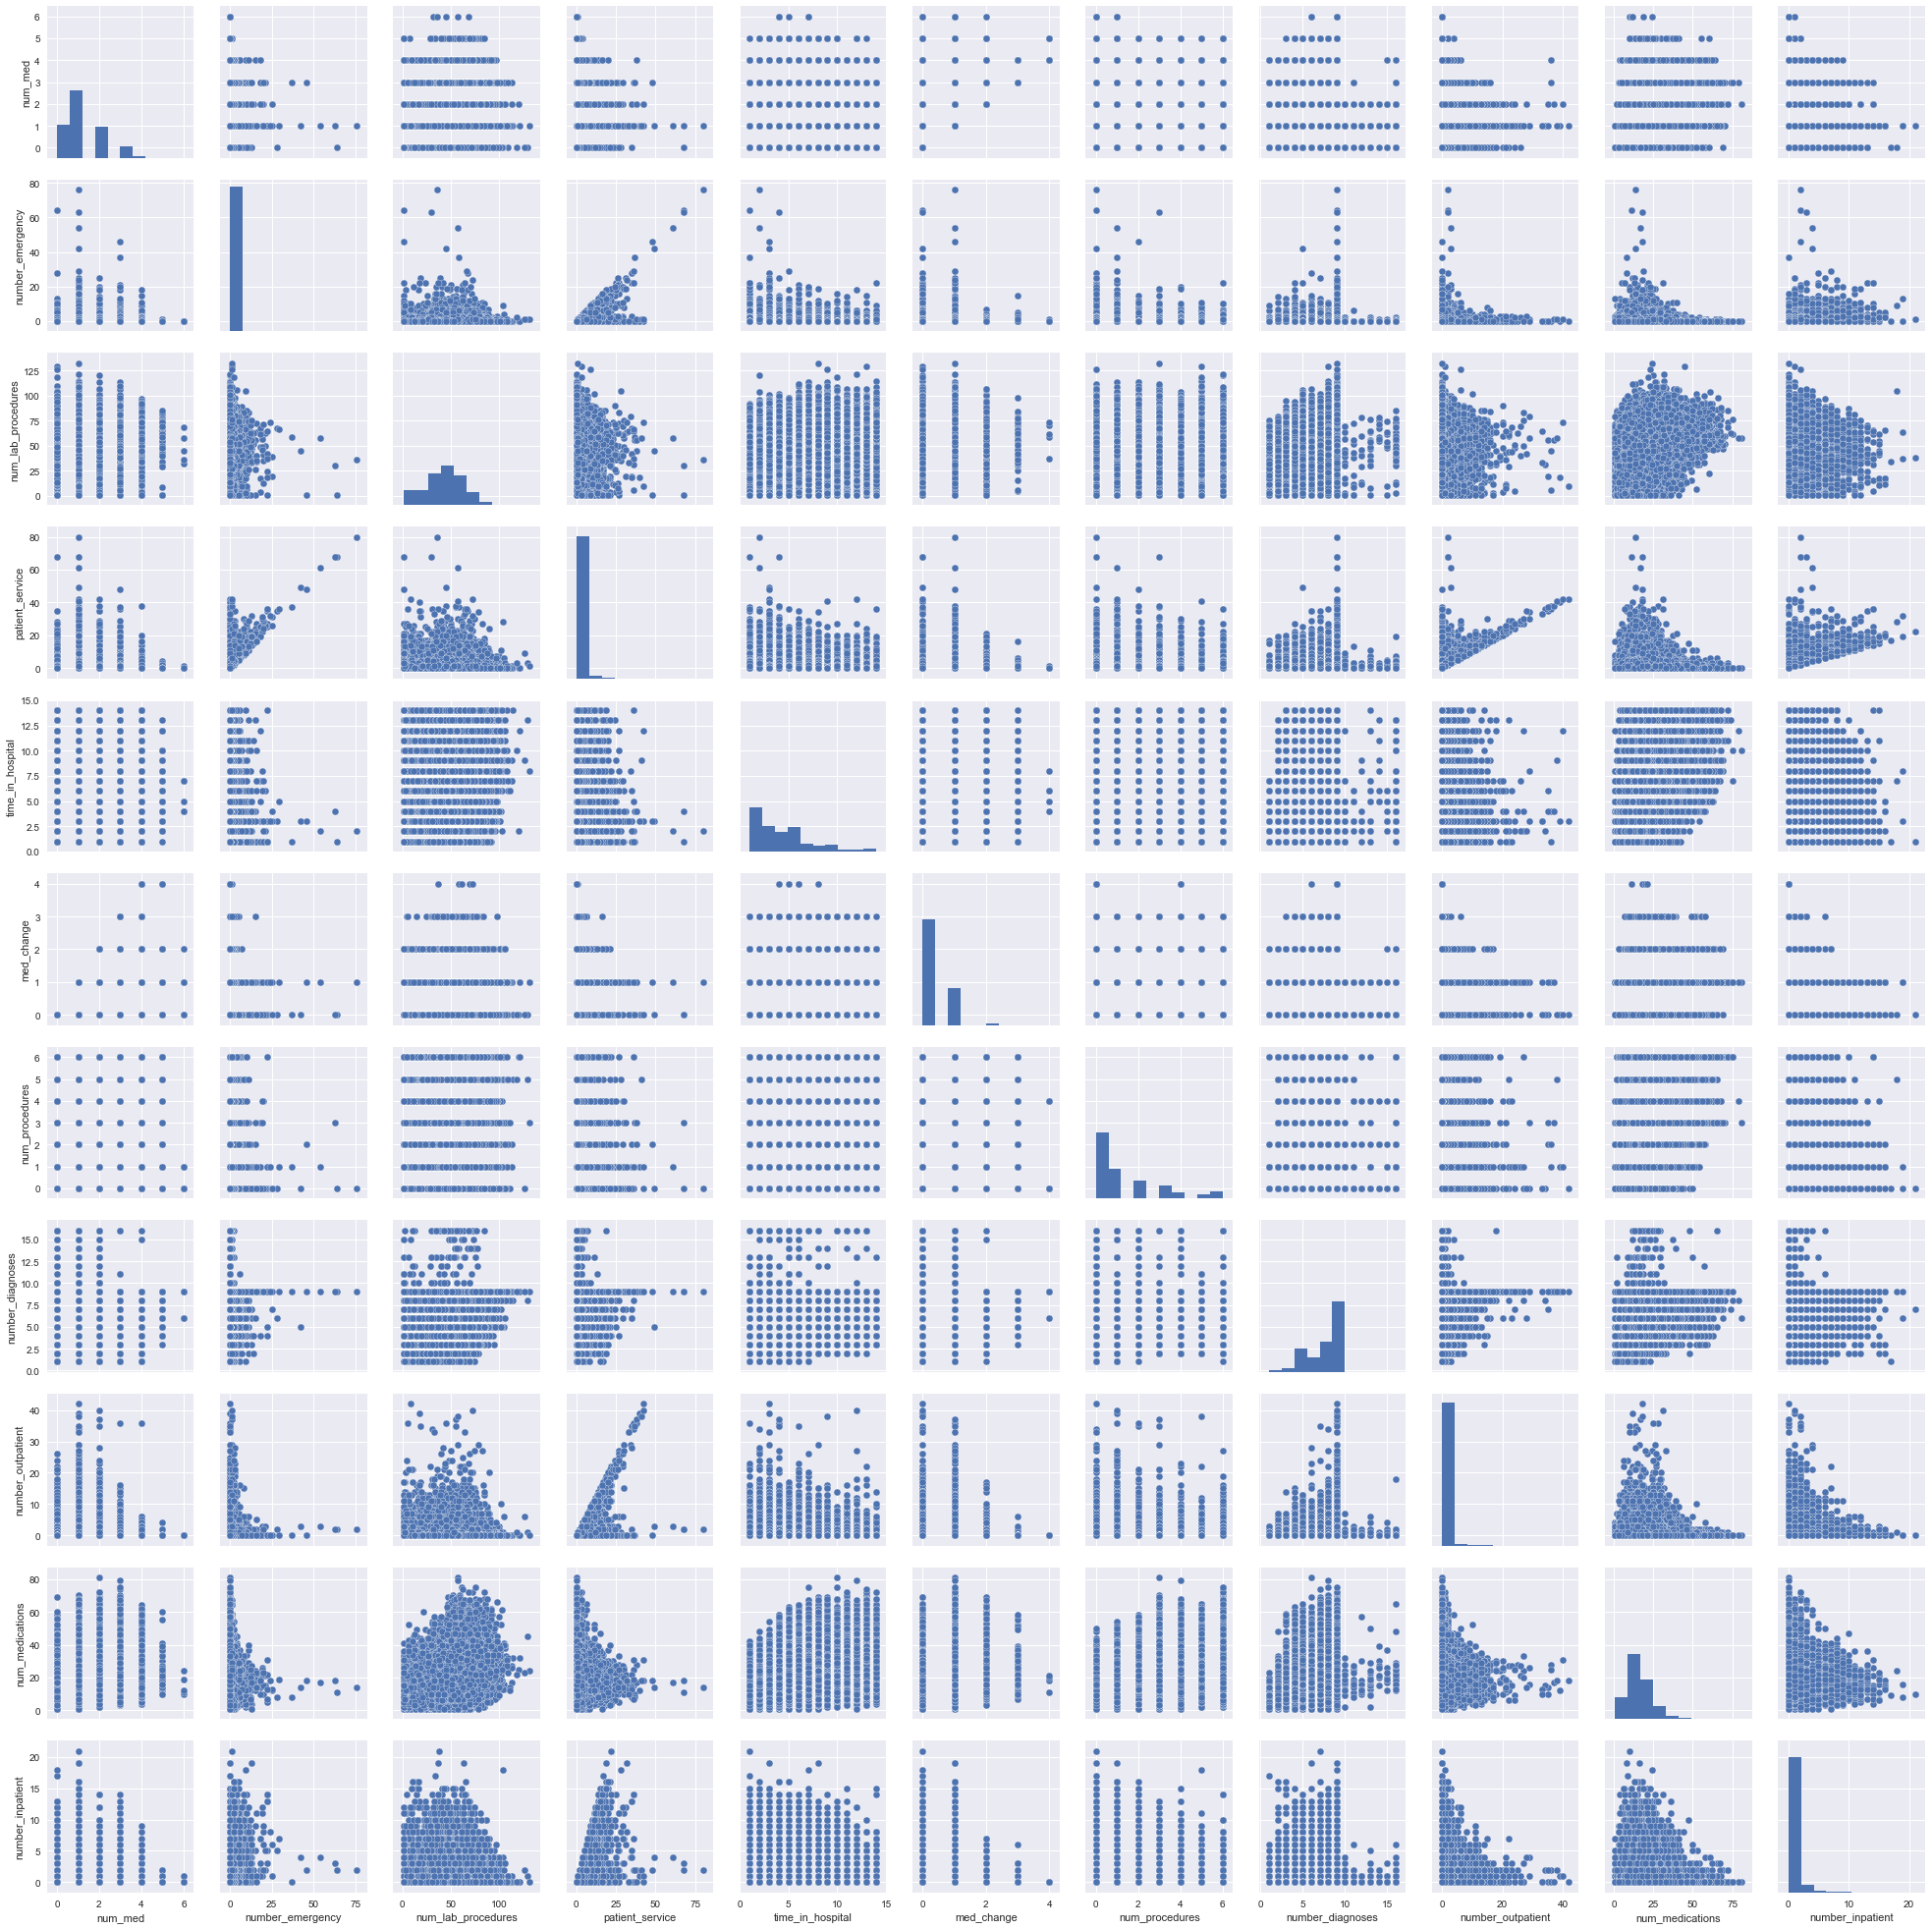

In [98]:
# Plot the pair scatter plot to check the distribution 
sns.set()
cols = ['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [99]:
# Check the skewness and kurtosis of the variables 
from scipy import stats
i=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
print(train[i].skew())
print(train[i].kurt())

num_med                0.678066
number_emergency      22.649042
num_lab_procedures    -0.239627
patient_service        5.313745
time_in_hospital       1.137276
med_change             1.423876
num_procedures         1.324363
number_diagnoses      -0.891600
number_outpatient      8.790942
num_medications        1.328952
number_inpatient       3.609237
dtype: float64
num_med                  0.282313
number_emergency      1163.612749
num_lab_procedures      -0.255417
patient_service         67.142638
time_in_hospital         0.867396
med_change               1.435763
num_procedures           0.891609
number_diagnoses        -0.073727
number_outpatient      147.256600
num_medications          3.513028
number_inpatient        20.612171
dtype: float64


In [100]:
"""From the scatter plot, we found most of numerical are highly skewed and had high kurtosis.
Using the threshold=+-1 as skewness for normal distributioon, 
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
As the standard for kurtosis, the threhold=3 is for normal distribution. 
So the variables that need to be transformed are: 1. number_emergency 2. patient_service 3.time_in_hospital 4. med_change\
5. num_procedures 6.num_outpatient 7.num_medications 8. num_inpatient"""

'From the scatter plot, we found most of numerical are highly skewed and had high kurtosis.\nUsing the threshold=+-1 as skewness for normal distributioon, \nIf skewness is less than -1 or greater than 1, the distribution is highly skewed.\nIf skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.\nIf skewness is between -0.5 and 0.5, the distribution is approximately symmetric.\nAs the standard for kurtosis, the threhold=3 is for normal distribution. \nSo the variables that need to be transformed are: 1. number_emergency 2. patient_service 3.time_in_hospital 4. med_change5. num_procedures 6.num_outpatient 7.num_medications 8. num_inpatient'

### Log Transformation

In [101]:
# log transforamtion for the skewed numerical variables 
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
for col in key:
    if abs(train[col].skew())>=1:
        train[col+"_log"]=np.log1p(train[col])
        print([col+"_log"],train[col+"_log"].skew())

['number_emergency_log'] 3.6291030366340697
['patient_service_log'] 1.1064806833594183
['time_in_hospital_log'] 0.10341360716227363
['med_change_log'] 1.1350977887575229
['num_procedures_log'] 0.523122171785963
['number_outpatient_log'] 2.72014768343293
['num_medications_log'] -0.4851017786134751
['number_inpatient_log'] 1.4377657193647482


## Standarlization

In [102]:
"""We found different scale of the numeriable variables are in different scale which will cause
different weight to the analysis so we transform the variables into comparable scales"""

def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))
# num_col is a list of all numeric features
train[num_col] = standardize(train[num_col])

## Correlation

In [103]:
#Check the correlation between variables 
train.drop(train.columns[train.columns.str.contains('unnamed',case = False)],axis = 1,inplace=True)
train_col =train.corr()
train_col

time_in_hospital  num_lab_procedures  num_procedures  \
time_in_hospital               1.000000            0.319027        0.191581   
num_lab_procedures             0.319027            1.000000        0.052141   
num_procedures                 0.191581            0.052141        1.000000   
num_medications                0.464353            0.264021        0.381255   
number_outpatient             -0.010085           -0.008678       -0.025302   
number_emergency              -0.009788           -0.001382       -0.038860   
number_inpatient               0.073775            0.039655       -0.066977   
number_diagnoses               0.221438            0.148904        0.068461   
readmitted                     0.045744            0.023541       -0.009974   
patient_service                0.031012            0.016461       -0.066690   
med_change                     0.160688            0.117204        0.010142   
num_med                        0.075012            0.029475        0.004754   
number_emergency_log          -0.007591            0.003486       -0.052583   
patient_service_log            0.046722            0.016322       -0.085881   
time_in_hospital_log           0.957352            0.334975        0.165775   
med_change_log                 0.158472            0.116351        0.008742   
num_procedures_log             0.206295            0.037231        0.960722   
number_outpatient_log         -0.017585           -0.021961       -0.033984   
num_medications_log            0.442712            0.256277        0.334835   
number_inpatient_log           0.088125            0.043842       -0.076668   

                       num_medications  number_outpatient  number_emergency  \
time_in_hospital              0.464353          -0.010085         -0.009788   
num_lab_procedures            0.264021          -0.008678         -0.001382   
num_procedures                0.381255          -0.025302         -0.038860   
num_medications               1.000000           0.045077          0.013742   
number_outpatient             0.045077           1.000000          0.091286   
number_emergency              0.013742           0.091286          1.000000   
number_inpatient              0.065715           0.106778          0.266818   
number_diagnoses              0.258193           0.092998          0.054425   
readmitted                    0.041800           0.019053          0.060911   
patient_service               0.066621           0.647440          0.606273   
med_change                    0.229139           0.029435          0.053808   
num_med                       0.227674           0.000264          0.007505   
number_emergency_log          0.024949           0.130970          0.821051   
patient_service_log           0.078923           0.541844          0.416974   
time_in_hospital_log          0.464633          -0.005612         -0.009312   
med_change_log                0.229697           0.031846          0.056512   
num_procedures_log            0.384716          -0.019934         -0.036799   
number_outpatient_log         0.054372           0.883733          0.119275   
num_medications_log           0.934708           0.057071          0.022113   
number_inpatient_log          0.073835           0.117053          0.228602   

                       number_inpatient  number_diagnoses  readmitted  \
time_in_hospital               0.073775          0.221438    0.045744   
num_lab_procedures             0.039655          0.148904    0.023541   
num_procedures                -0.066977          0.068461   -0.009974   
num_medications                0.065715          0.258193    0.041800   
number_outpatient              0.106778          0.092998    0.019053   
number_emergency               0.266818          0.054425    0.060911   
number_inpatient               1.000000          0.103145    0.167983   
number_diagnoses               0.103145          1.000000    0.052365   
readmitted                     0.167983       

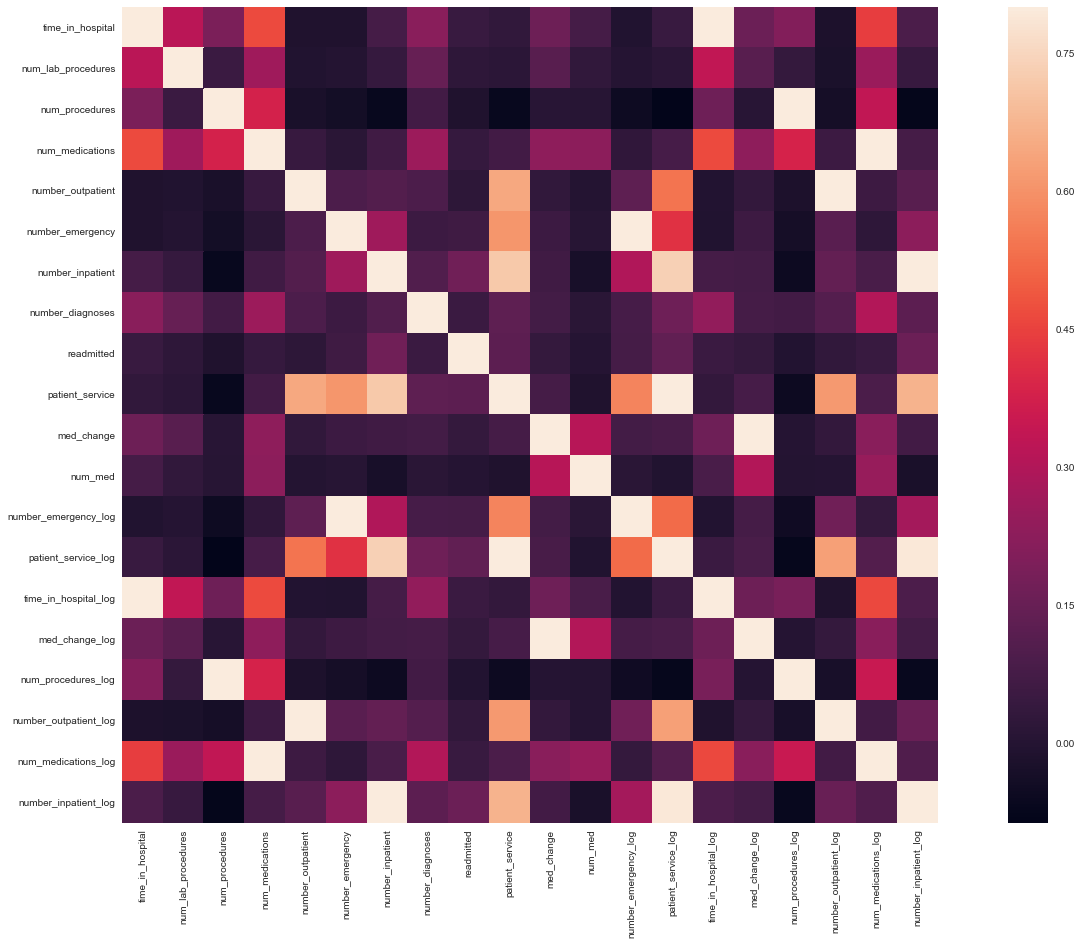

In [104]:
# Draw heatmap to plot the correlations
"""metformin-rosiglitazone is with all NAs"""
a = plt.subplots(figsize=(25, 15))
a = sns.heatmap(train_col, vmax=.8, square=True)

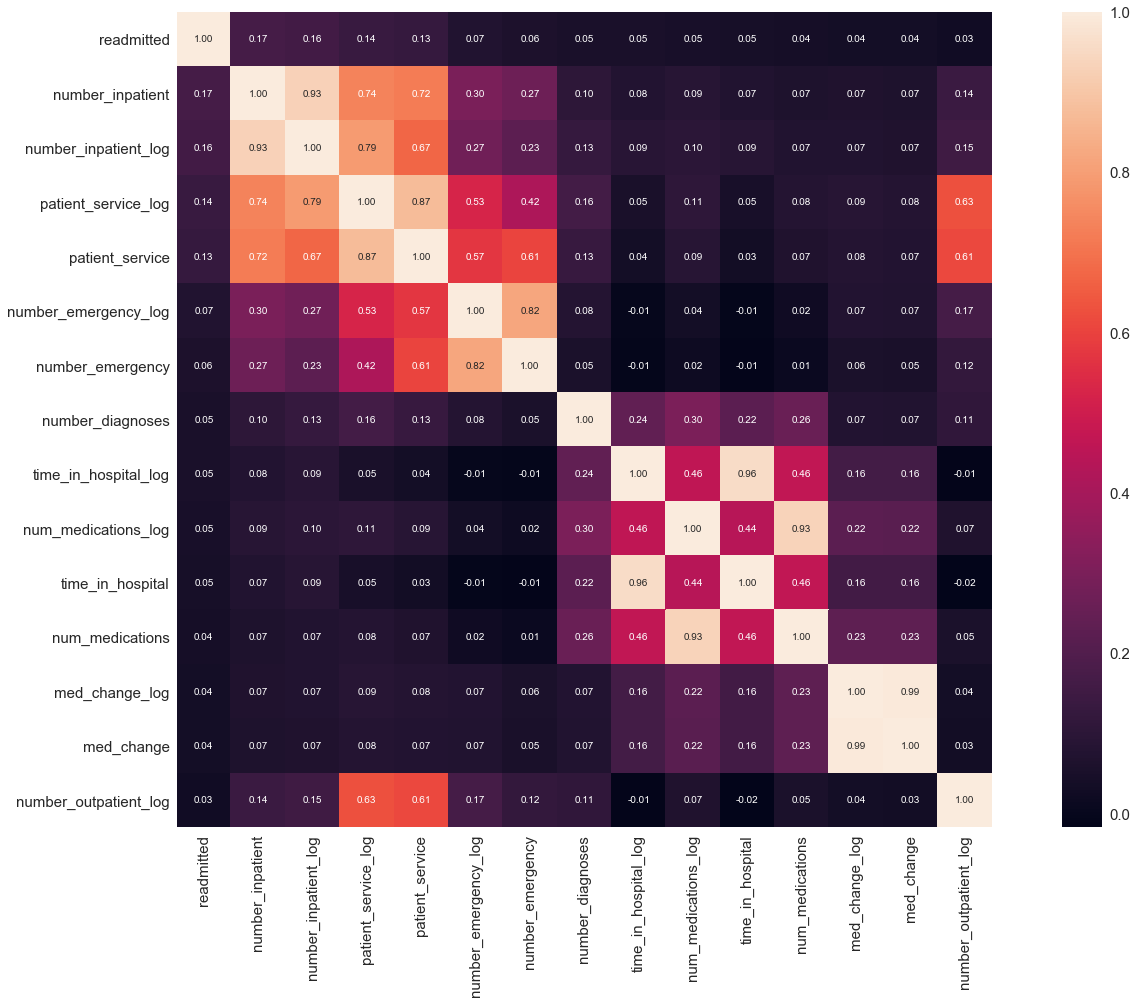

In [105]:
# find the top 15 correlated variables 
k = 15
cols = train_col.nlargest(k,'readmitted')['readmitted'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(25, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [106]:
train.diabetesMed = train.diabetesMed.astype('int64')
train.change = train.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
train[i] = train[i].astype('int64')

train.dtypes

race                         object
gender                       object
age                          object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                 

## Outlier

In [107]:
key=['num_med',
 'number_emergency',
 'num_lab_procedures',
 'patient_service',
 'time_in_hospital',
 'med_change',
 'num_procedures',
 'number_diagnoses',
 'number_outpatient',
 'num_medications',
 'number_inpatient']
train = train[(np.abs(sp.stats.zscore(train[key])) < 3).all(axis=1)]

In [108]:
train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_service', 'med_change', 'num_med', 'primary_diag',
       'secondary_diag', 'additional_diag', 'number_emergency_log',
       'patient_service_log', 'time_in_hospital_log', 'med_change_log',
 

In [109]:
for i in train.columns:
    df=train[i].value_counts()
    print(df)

1    68090
2    17275
3     1818
0     1346
4      590
Name: race, dtype: int64
0    48181
1    40938
Name: gender, dtype: int64
75    23003
65    19716
85    15188
55    15112
45     8352
35     3286
95     2467
25     1321
15      560
5       114
Name: age, dtype: int64
1    63365
3    16483
5     9261
4       10
Name: admission_type_id, dtype: int64
1     65653
2     18408
18     4287
7       537
28      127
10       93
19        8
27        4
20        2
Name: discharge_disposition_id, dtype: int64
9     56717
1     27147
4      5239
8        11
11        5
Name: admission_source_id, dtype: int64
-0.467585    16055
-0.803582    15559
-1.139580    12937
-0.131587    12456
 0.204411     8808
 0.540408     6515
 0.876406     5012
 1.212404     3713
 1.548401     2487
 1.884399     1927
 2.220397     1510
 2.556394     1169
 2.892392      971
Name: time_in_hospital, dtype: int64
-2.134345    2923
 0.004121    2524
 0.055037    2177
 0.105953    2092
-0.250459    1985
-0.148627    1961


1.386294    16055
1.098612    15559
0.693147    12937
1.609438    12456
1.791759     8808
1.945910     6515
2.079442     5012
2.197225     3713
2.302585     2487
2.397895     1927
2.484907     1510
2.564949     1169
2.639057      971
Name: time_in_hospital_log, dtype: int64
0.000000    66905
0.693147    22214
Name: med_change_log, dtype: int64
0.000000    41435
0.693147    18388
1.098612    11164
1.386294     8223
1.945910     3790
1.609438     3534
1.791759     2585
Name: num_procedures_log, dtype: int64
0.000000    75856
0.693147     7418
1.098612     3134
1.386294     1762
1.609438      949
Name: number_outpatient_log, dtype: int64
2.639057    5491
2.564949    5461
2.484907    5336
2.772589    5200
2.708050    5092
2.397895    4950
2.833213    4837
2.302585    4546
2.890372    4376
2.197225    4006
2.944439    3967
2.995732    3532
2.079442    3225
3.044522    3194
3.091042    2785
1.945910    2490
3.135494    2488
3.178054    2066
1.791759    1834
3.218876    1790
3.258097    1567


In [110]:
train['primary_diag'] = train['primary_diag'].astype('int')
train_v = pd.get_dummies(train, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag'], drop_first = True)

In [111]:
nom_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'primary_diag' ]

In [112]:
num_cols = list(set(list(train._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['diabetesMed',
 'number_inpatient_log',
 'metformin-rosiglitazone',
 'glimepiride',
 'tolbutamide',
 'miglitol',
 'troglitazone',
 'number_outpatient_log',
 'glipizide-metformin',
 'glyburide-metformin',
 'glimepiride-pioglitazone',
 'num_procedures_log',
 'rosiglitazone',
 'num_lab_procedures',
 'time_in_hospital',
 'patient_service_log',
 'metformin-pioglitazone',
 'number_emergency_log',
 'acetohexamide',
 'primary_diag',
 'repaglinide',
 'num_med',
 'num_procedures',
 'number_diagnoses',
 'glyburide',
 'pioglitazone',
 'acarbose',
 'med_change',
 'tolazamide',
 'time_in_hospital_log',
 'num_medications_log',
 'A1Cresult',
 'med_change_log',
 'number_emergency',
 'glipizide',
 'num_medications',
 'patient_service',
 'number_outpatient',
 'number_inpatient',
 'chlorpropamide',
 'metformin',
 'nateglinide',
 'insulin']

In [113]:
# Append all columns with dummy variables 
nom_cols_new = []
for i in nom_cols:
    for j in train_v.columns:
        if i in j:
            nom_cols_new.append(j)

In [114]:
nom_cols_new

['race_1',
 'race_2',
 'race_3',
 'race_4',
 'gender_1',
 'admission_type_id_3',
 'admission_type_id_4',
 'admission_type_id_5',
 'discharge_disposition_id_2',
 'discharge_disposition_id_7',
 'discharge_disposition_id_10',
 'discharge_disposition_id_18',
 'discharge_disposition_id_19',
 'discharge_disposition_id_20',
 'discharge_disposition_id_27',
 'discharge_disposition_id_28',
 'admission_source_id_4',
 'admission_source_id_8',
 'admission_source_id_9',
 'admission_source_id_11',
 'max_glu_serum_1',
 'max_glu_serum_99',
 'A1Cresult_1',
 'A1Cresult_99',
 'primary_diag_1',
 'primary_diag_2',
 'primary_diag_3',
 'primary_diag_4',
 'primary_diag_5',
 'primary_diag_6',
 'primary_diag_7',
 'primary_diag_8']

In [115]:
train_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_service', 'med_change', 'num_med', 'secondary_diag',
       'additional_diag', 'number_emergency_log', 'patient_service_log',
       'time_in_hospital_log', 'med_change_log', 'num_procedures_log',
       'number_outpatient_log', 'num_medications_log', 'number_inpatient_log',
       'race_1', 'race_2', 'race_3', 'race_4', 'ge

In [116]:
# Create a feature set
feature_set= ['race_1','race_2','race_3','race_4','gender_1','age','admission_type_id_3',
       'admission_type_id_4','admission_type_id_5','discharge_disposition_id_2', 
'discharge_disposition_id_7','discharge_disposition_id_10','discharge_disposition_id_18','discharge_disposition_id_19',
        'discharge_disposition_id_20','discharge_disposition_id_27','discharge_disposition_id_28','admission_source_id_4', 'admission_source_id_8',
        'admission_source_id_9','admission_source_id_11','num_lab_procedures','number_diagnoses', 'max_glu_serum_1', 'max_glu_serum_99', 'A1Cresult_1', 'A1Cresult_99', 
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 
        'num_med', 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4','primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8',
        'number_emergency_log','patient_service_log', 'time_in_hospital_log', 'med_change_log',
       'num_procedures_log', 'number_outpatient_log', 'num_medications_log',
       'number_inpatient_log']

In [117]:
train_v.to_csv('./modified_diabetes1205_V2.csv',index=None)

In [118]:
train_v = pd.read_csv('./modified_diabetes1205_V2.csv')

In [119]:
train_v.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'patient_service', 'med_change', 'num_med', 'secondary_diag',
       'additional_diag', 'number_emergency_log', 'patient_service_log',
       'time_in_hospital_log', 'med_change_log', 'num_procedures_log',
       'number_outpatient_log', 'num_medications_log', 'number_inpatient_log',
       'race_1', 'race_2', 'race_3', 'race_4', 'ge

# Modeling 

In [122]:
train_input = train_v[feature_set]
train_output = train_v['readmitted']

Class 0: 79512
Class 1: 9607
Proportion: 8.28 : 1


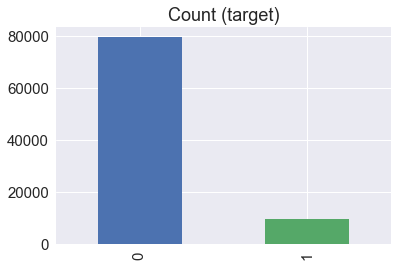

In [123]:
# Check the class for the outcome variable 
target_count=train_v['readmitted'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

## Logistic Regression-Benchmark  

In [124]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

sns.set(style='white', context='notebook', palette='deep')

In [125]:
# Split the training and testing dataset 
x_train, x_test, y_train, y_test= model_selection.train_test_split(train_input, train_output, random_state = 0, test_size=0.1)

Class 0: 79512
Class 1: 9607
Proportion: 8.28 : 1


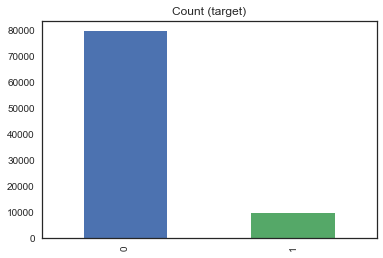

In [126]:
import numpy as np
import pandas as pd

target_count = train_output.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 89.22%


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Set score: 89.12%


In [128]:
y_pred = LogR.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

Accuracy is 0.89
Precision is 0.00
Recall is 0.00


In [130]:
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict    0  All
Actual           
0        779  779
1        112  112
All      891  891

[[7942    1]
 [ 969    0]]


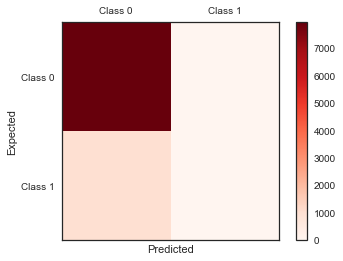

In [131]:
# Confusion Matrix and Class imbalance cehcking 
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cfm, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Class Imbalance 

In [132]:
# Class Imbalance Processing: Using re-sampling method
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 79512, 1: 9607})
New dataset shape Counter({0: 79512, 1: 79512})


In [133]:
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))

In [134]:
pd.concat([pd.DataFrame(train_input_new), pd.DataFrame(train_output_new)],axis=1).to_csv('./smote_data.csv',header=None)

In [135]:
# Again,split the training and testing dataset 
x_train_new, x_test_new, y_train_new, y_test_new= model_selection.train_test_split(train_input_new, train_output_new, random_state = 0, test_size=0.1)

## Logistic Regression_2

In [136]:
# Run Logistic Regression Again 
LogR = LogisticRegression(fit_intercept=True, penalty='l1',random_state = 0)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(LogR, x_train_new, y_train_new, cv=10))))
LogR.fit(x_train_new, y_train_new)
print("Test Set score: {:.2%}".format(LogR.score(x_test_new, y_test_new)))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Cross Validation Score: 61.29%


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test Set score: 61.35%


In [137]:
y_test_predict = LogR.predict(x_test_new)

[[5009 2827]
 [3319 4748]]


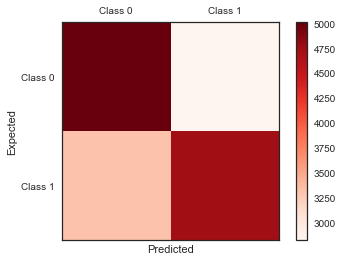

In [138]:
# Confusion Matrix and Class imbalance cehcking 
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test_new, y_test_predict)
print(cfm)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cfm, cmap=plt.cm.Reds)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [139]:
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict     0     1    All
Actual                    
0        5009  2827   7836
1        3319  4748   8067
All      8328  7575  15903

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_logreg = accuracy_score(y_test_new, y_test_predict)
precision_logreg = precision_score(y_test_new, y_test_predict)
recall_logreg = recall_score(y_test_new, y_test_predict)
auc_logreg = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.61
Precision is 0.63
Recall is 0.59
AUC is 0.61


## Decision Tree

### Decision Tree-Entropy 

In [142]:
feature_set_dec = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log', 
                 'number_emergency_log', 'number_inpatient_log', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_1', 'race_2', 'race_3', 
                 'race_4', 'gender_1', 
                 'admission_source_id_4', 'admission_source_id_8', 'admission_source_id_9','admission_source_id_11', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'max_glu_serum_1', 'max_glu_serum_99', 'A1Cresult_1', 'A1Cresult_99', 
                 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4','primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8']

In [143]:
train_input = train_v[feature_set_dec]
train_output = train_v['readmitted']
train_v['readmitted'].value_counts()

0    79512
1     9607
Name: readmitted, dtype: int64

In [144]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns = list(train_input.columns))
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 79512, 1: 9607})
New dataset shape Counter({0: 79512, 1: 79512})


In [145]:
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, x_train_new, y_train_new, cv=10))))
dte.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(dte.score(x_test_new, y_test_new)))

Cross Validation score: 88.99%
Dev Set score: 89.44%


In [146]:
y_test_predict = dte.predict(x_test_new)

In [147]:
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict      0      1    All
Actual                      
0        14494   1191  15685
1         2168  13952  16120
All      16662  15143  31805

In [148]:
# Calculate Accuracy, precision, reacall and AUC with classificaiton-entropy
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_dte = accuracy_score(y_test_new, y_test_predict)
precision_dte = precision_score(y_test_new, y_test_predict)
recall_dte = recall_score(y_test_new, y_test_predict)
auc_dte = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.89
Precision is 0.92
Recall is 0.87
AUC is 0.89


### Decision Tree-Gini 

In [149]:
# Calculate
from sklearn.tree import DecisionTreeClassifier
dte = DecisionTreeClassifier(max_depth=28, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(dte, x_train_new, y_train_new, cv=10))))
dte.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(dte.score(x_test_new, y_test_new)))

Cross Validation score: 89.10%
Dev Set score: 89.46%


In [150]:
y_test_predict = dte.predict(x_test_new)

In [151]:
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict      0      1    All
Actual                      
0        14467   1218  15685
1         2135  13985  16120
All      16602  15203  31805

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_dtg = accuracy_score(y_test_new, y_test_predict)
precision_dtg = precision_score(y_test_new, y_test_predict)
recall_dtg = recall_score(y_test_new, y_test_predict)
auc_dtg = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.89
Precision is 0.92
Recall is 0.87
AUC is 0.89


                       Feature  Importance
0                          age    0.020835
8                    metformin    0.023881
4        number_outpatient_log    0.024448
25                    gender_1    0.029436
3              num_medications    0.041807
7             number_diagnoses    0.042140
2               num_procedures    0.045278
30  discharge_disposition_id_2    0.065802
1             time_in_hospital    0.260244
6         number_inpatient_log    0.268055


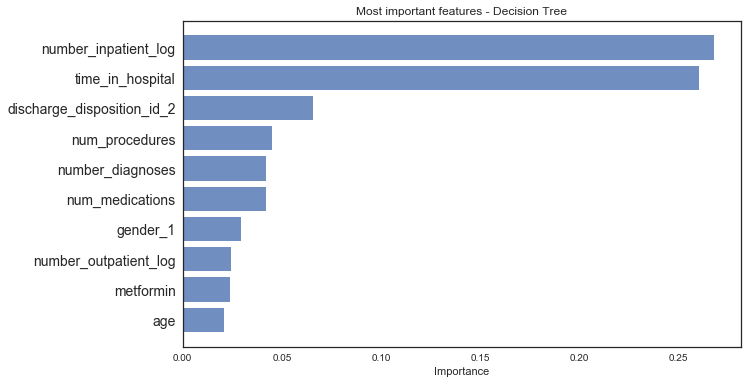

In [153]:
# Create list of top most features based on importance
feature_names = x_train_new.columns
feature_imports = dte.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

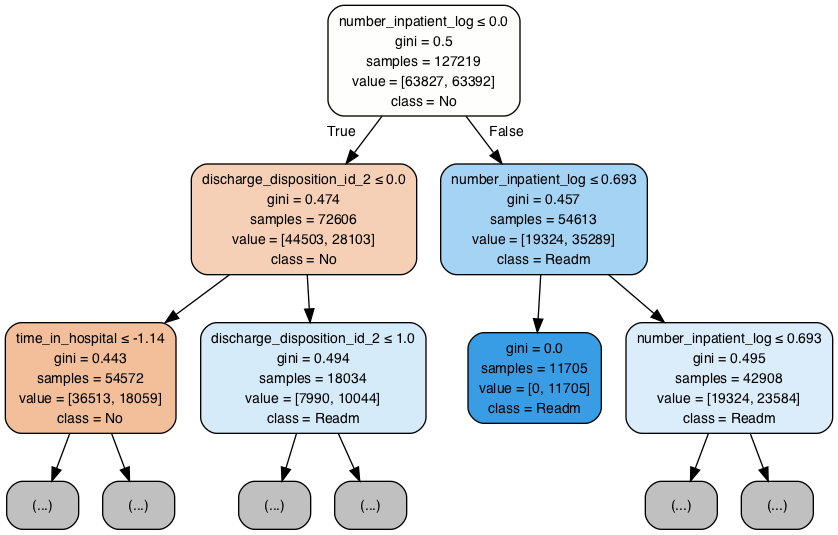

In [154]:
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=x_train_new.columns, max_depth=2,
                                 class_names=["No","Readm"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

## Random Forest 

In [155]:
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

Cross Validation score: 92.23%
Dev Set score: 92.47%


In [156]:
y_test_predict = forrest.predict(x_test_new)
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict      0      1    All
Actual                      
0        15400    285  15685
1         2109  14011  16120
All      17509  14296  31805

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_forreste = accuracy_score(y_test_new, y_test_predict)
precision_forreste = precision_score(y_test_new, y_test_predict)
recall_forreste = recall_score(y_test_new, y_test_predict)
auc_forreste = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.92
Precision is 0.98
Recall is 0.87
AUC is 0.93


In [158]:
forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

Cross Validation score: 92.29%
Dev Set score: 92.61%


In [159]:
y_test_predict = forrest.predict(x_test_new)
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict      0      1    All
Actual                      
0        15418    267  15685
1         2082  14038  16120
All      17500  14305  31805

In [160]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_forrestg = accuracy_score(y_test_new, y_test_predict)
precision_forrestg = precision_score(y_test_new, y_test_predict)
recall_forrestg = recall_score(y_test_new, y_test_predict)
auc_forrestg = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.93
Precision is 0.98
Recall is 0.87
AUC is 0.93


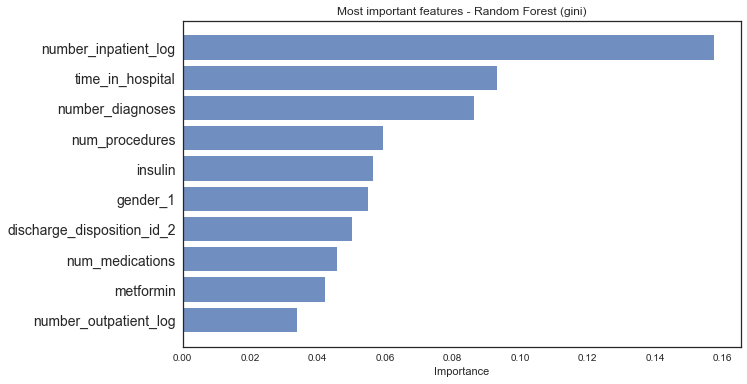

In [161]:
# Create list of top most features based on importance
feature_names = x_train_new.columns
feature_imports = forrest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest (gini)')
plt.show()

# Modeling Improvement 

## XGBOOST-Tuning 

In [173]:
import pandas as pd
import xgboost as xgb
import operator

parameters:
    1. eta
    2. max_depth
    3. colsample_bytree   
   
- The tuning process includes the above three parameters: 
we set eta large firstly and we tune max_depth firstly then colsample_bytree   
after we make sure them we can tune eta and num_rounds together  

|max_depth |AUC |
|---|----|
| | |
| 3|0.94|
| 4|0.94|
| 5|0.94|
| 6|0.94|
| 7|0.94|
| 8|0.94|
| 9|0.94|


In [175]:
def result (y_test_new, y_test_predict):
    print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
    print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
    print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
    print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

In [176]:
for max_depth in [3,4,5,6,7,8,9]:
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": 0.2, \
                  "max_depth": max_depth,"colsample_bytree":0.7, 'silent':1}
    num_rounds = 20000

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(xgb_params.items(), dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

[0]	train-error:0.31129	test-error:0.314385
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 100 rounds.
[100]	train-error:0.06907	test-error:0.068951
[200]	train-error:0.063976	test-error:0.064109
[300]	train-error:0.062538	test-error:0.062726
[400]	train-error:0.061815	test-error:0.062286
[500]	train-error:0.061477	test-error:0.061909
[600]	train-error:0.06106	test-error:0.061846
[700]	train-error:0.06073	test-error:0.061468
[800]	train-error:0.06051	test-error:0.061405
[900]	train-error:0.060313	test-error:0.06128
Stopping. Best iteration:
[864]	train-error:0.060353	test-error:0.061217

Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94
[0]	train-error:0.310323	test-error:0.313316
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 100 rounds.
[100]	train-error:0.064637	test-error:0.064644
[200]	train-error:

|colsample_bytree |AUC |
|---|----|
| | |
| 0.6|0.94|
| 0.7|0.94|
| 0.8|0.94|
| 0.9|0.94|
| 1  |0.94|

In [ ]:
for colsample_bytree in [0.6, 0.7, 0.8, 0.9, 1]:
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": 0.2, \
                  "max_depth": 8,"colsample_bytree":colsample_bytree, 'silent':1}
    num_rounds = 20000

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(xgb_params.items(), dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

[0]	train-error:0.220439	test-error:0.22704
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 100 rounds.
[100]	train-error:0.060392	test-error:0.06216
[200]	train-error:0.055707	test-error:0.061846
Stopping. Best iteration:
[166]	train-error:0.057342	test-error:0.061688

Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94
[0]	train-error:0.219684	test-error:0.225939
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 100 rounds.
[100]	train-error:0.060117	test-error:0.062097
[200]	train-error:0.054929	test-error:0.061909
Stopping. Best iteration:
[160]	train-error:0.057397	test-error:0.061783

Accuracy is 0.94
Precision is 1.00
Recall is 0.88
AUC is 0.94
[0]	train-error:0.219488	test-error:0.226505
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error 

|eta |AUC |
|---|----|
| | |
| 0.01|0.94|
| 0.02|0.94|
| 0.05|0.94|

In [ ]:
for eta in [0.01, 0.02, 0.05]: 
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": eta, \
                  "max_depth": 8,"colsample_bytree":0.9,  'silent':1}
    num_rounds = 20000

    dtrain = xgb.DMatrix(x_train_new, label=y_train_new)
    dtest= xgb.DMatrix(x_test_new, label=y_test_new)
    evallist = [(dtrain, 'train'), (dtest, 'test')]
    gbm = xgb.train(xgb_params.items(), dtrain, num_rounds, evals=evallist,verbose_eval=100,early_stopping_rounds=100)
    y_predict = gbm.predict(xgb.DMatrix(x_test_new))
    result(y_test_new,np.round(y_predict))

In [7]:
# Using XGBoosting to find the strongest predictors 
from xgboost import plot_importance
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# figure(num=None, figsize=(20,10), dpi=200, facecolor='w', edgecolor='k')
# plt.figure(figsize=(40,20))
ax = xgb.plot_importance(gbm)
fig = ax.figure
fig.set_size_inches(40,20)

NameError: name 'xgb' is not defined

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: Matplo

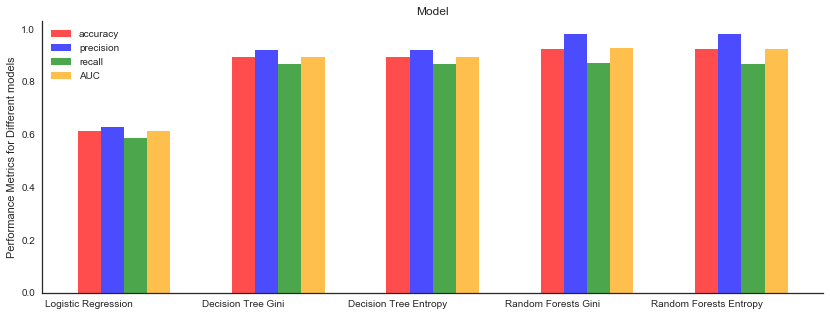

In [164]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste, accuracy_xgb]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste, precision_xgb]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste, recall_xgb]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste, auc_xgb]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [39]:
def result (y_test_new,y_test_predict):
	
	print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
	print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
	print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
	print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))


In [ ]:
# plotting the accuracy for training and test
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [accuracy_logreg, accuracy_dtg, accuracy_dte, accuracy_forrestg, accuracy_forreste, accuracy_xgb]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost' ]
values = [precision_logreg, precision_dtg, precision_dte, precision_forrestg, precision_forreste, precision_xgb]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [recall_logreg, recall_dtg, recall_dte, recall_forrestg, recall_forreste, recall_xgb]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree Gini', 'Decision Tree Entropy', 'Random Forests Gini', 'Random Forests Entropy', 'XGBoost']
values = [auc_logreg, auc_dtg, auc_dte, auc_forrestg, auc_forreste, auc_xgb]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'AUC')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()